In [978]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers
from keras.optimizers import SGD,Adam

In [979]:
dataset = pd.read_csv('./data/Iris.csv')

In [980]:
#df # Species (1=Iris-setosa; 2=Iris-versicolor and 3=Iris-virginica)

In [981]:
# dataset = df.values

In [982]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [983]:
df.isnull().values.any()

False

In [984]:
# dataset[:,0:5]

In [985]:
# X = dataset[:,1:5] 

In [986]:
# Y = dataset[:,5]

In [987]:
# min_max_scaler = preprocessing.MinMaxScaler()
# X_scale = min_max_scaler.fit_transform(X)

In [988]:
#X_scale

In [989]:
X = dataset.iloc[:,1:5].values
y = dataset.iloc[:,5].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [990]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [991]:
#X_train (5 input features, 70% of full dataset)
#X_val (5 input features, 15% of full dataset)
#X_test (5 input features, 15% of full dataset)
#Y_train (1 label, 70% of full dataset)
#Y_val (1 label, 15% of full dataset)
#Y_test (1 label, 15% of full dataset)

In [992]:
model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 10)                50        
_________________________________________________________________
dense_200 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_201 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_202 (Dense)            (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [993]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [994]:
optimizer='sgd'

In [995]:
loss='binary_crossentropy'

In [996]:
metrics=['accuracy']

In [997]:
hist = model.fit(X_train,Y_train,epochs=100, validation_data=(X_val, Y_val))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Train on 105 samples, validate on 22 samples
Epoch 1/100
105/105 [==============================] - 2s 18ms/step - loss: 0.6106 - acc: 0.7048 - val_loss: 0.6086 - val_acc: 0.7424
Epoch 2/100
105/105 [==============================] - 0s 113us/step - loss: 0.6051 - acc: 0.7048 - val_loss: 0.6046 - val_acc: 0.7576
Epoch 3/100
105/105 [==============================] - 0s 166us/step - loss: 0.6009 - acc: 0.7143 - val_loss: 0.6014 - val_acc: 0.7273
Epoch 4/100
105/105 [==============================] - 0s 130us/step - loss: 0.5970 - acc: 0.7079 - val_loss: 0.5969 - val_acc: 0.7273
Epoch 5/100
105/105 [==============================] - 0s 176us/step - loss: 0.5921 - acc: 0.7079 - val_loss: 0.5932 - val_acc: 0.7121
Epoch 6/100
105/105 [==============================] - 0s 123us/step - loss: 0.5878 - acc: 0.7048 - val_loss: 0.5895 - val_acc: 0.6970
Epoch 7/100
105/105 [==============================] - 0s 169us/step - loss: 0.5842 - acc: 0.7016 - val_loss: 0.5861 - val_acc: 0.6970
Epoch 8/100

Epoch 61/100
105/105 [==============================] - 0s 143us/step - loss: 0.4549 - acc: 0.8032 - val_loss: 0.4738 - val_acc: 0.7879
Epoch 62/100
105/105 [==============================] - 0s 142us/step - loss: 0.4530 - acc: 0.8063 - val_loss: 0.4722 - val_acc: 0.7879
Epoch 63/100
105/105 [==============================] - 0s 103us/step - loss: 0.4508 - acc: 0.8032 - val_loss: 0.4703 - val_acc: 0.7879
Epoch 64/100
105/105 [==============================] - 0s 175us/step - loss: 0.4489 - acc: 0.8032 - val_loss: 0.4686 - val_acc: 0.7879
Epoch 65/100
105/105 [==============================] - 0s 129us/step - loss: 0.4474 - acc: 0.8063 - val_loss: 0.4669 - val_acc: 0.7879
Epoch 66/100
105/105 [==============================] - 0s 128us/step - loss: 0.4455 - acc: 0.8063 - val_loss: 0.4651 - val_acc: 0.7879
Epoch 67/100
105/105 [==============================] - 0s 126us/step - loss: 0.4434 - acc: 0.8032 - val_loss: 0.4635 - val_acc: 0.7879
Epoch 68/100
105/105 [==========================

NameError: name 'np' is not defined

In [998]:
model.evaluate(X_test, Y_test)[1]

23/23 [==============================] - 0s 97us/step


0.8695651888847351

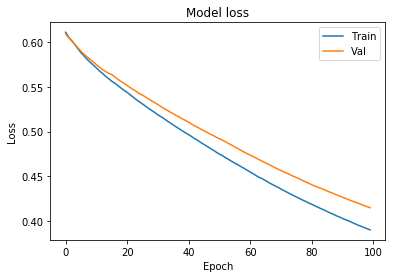

In [999]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

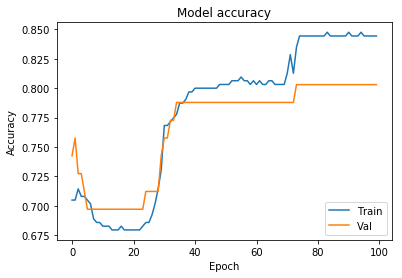

In [1000]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [1001]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(5,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

ValueError: Error when checking input: expected dense_203_input to have shape (5,) but got array with shape (4,)

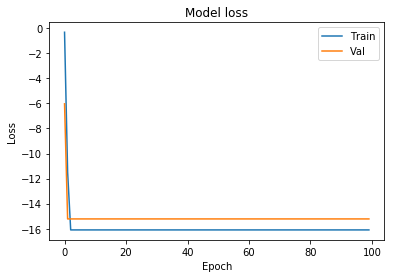

In [880]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

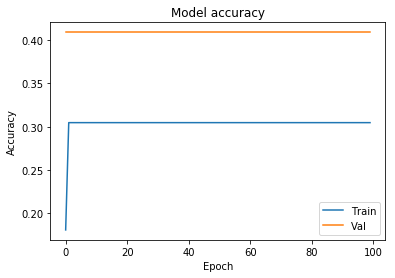

In [881]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [882]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(5,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [599]:
kernel_regularizer=regularizers.l2(0.01)

In [600]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 105 samples, validate on 22 samples
Epoch 1/100
105/105 [==============================] - 2s 20ms/step - loss: 28.8631 - acc: 0.2381 - val_loss: 21.0362 - val_acc: 0.4091
Epoch 2/100
105/105 [==============================] - 0s 1ms/step - loss: 14.8093 - acc: 0.3048 - val_loss: 7.0322 - val_acc: 0.4091
Epoch 3/100
105/105 [==============================] - 0s 1ms/step - loss: 5.1853 - acc: 0.3048 - val_loss: 3.7899 - val_acc: 0.4091
Epoch 4/100
105/105 [==============================] - 0s 1ms/step - loss: 2.0329 - acc: 0.3048 - val_loss: 0.8758 - val_acc: 0.4091
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: -0.7727 - acc: 0.3048 - val_loss: -1.6625 - val_acc: 0.4091
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: -3.1995 - acc: 0.3048 - val_loss: -3.8239 - val_acc: 0.4091
Epoch 7/100
105/105 [==============================] - 0s 1ms/step - loss: -5.2552 - acc: 0.3048 - val_loss: -5.6327 - val_acc: 0.4091
Epoch 8/100
10

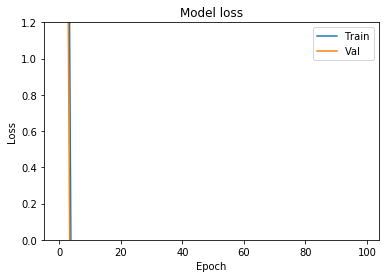

In [601]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

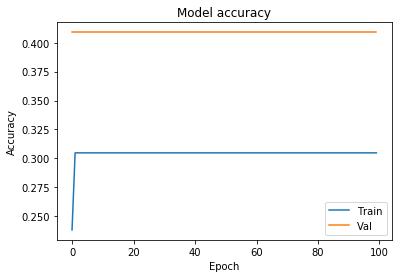

In [602]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()